<a href="https://colab.research.google.com/github/fares-mldev/uns-ml2021/blob/main/TP1/ML_TP1_Anscombe's_Quartet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 Anscombe's Quartet

In [ ]:
# Numpy, Pandas, Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Regression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
# Datasets
ds1 = [(10.0, 8.04),(8.0, 6.95),(13.0, 7.58),(9.0, 8.81),(11.0, 8.33),(14.0, 9.96),(6.0, 7.24),(4.0, 4.26),(12.0, 10.84),(7.0, 4.82),(5.0, 5.68)]
ds2 = [(10.0, 9.14),(8.0, 8.14),(13.0, 8.74),(9.0, 8.77),(11.0, 9.26),(14.0, 8.10),(6.0, 6.13),(4.0, 3.10),(12.0, 9.13),(7.0, 7.26),(5.0, 4.74)]
ds3 = [(10.0, 7.46),(8.0, 6.77),(13.0, 12.74),(9.0, 7.11),(11.0, 7.81),(14.0, 8.84),(6.0, 6.08),(4.0, 5.39),(12.0, 8.15),(7.0, 6.42),(5.0, 5.73)]
ds4 = [(8.0, 6.58),(8.0, 5.76),(8.0, 7.71),(8.0, 8.84),(8.0, 8.47),(8.0, 7.04),(8.0, 5.25),(19.0, 12.50),(8.0, 5.56),(8.0, 7.91),(8.0, 6.89)]

In [ ]:
# Convert dataset to pandas dataframe
def ds2df(ds):
  return pd.DataFrame(ds, columns =['x','y'])

# Build dataset dictionary
dfs = {'ds1':ds2df(ds1) , 'ds2':ds2df(ds2), 'ds3':ds2df(ds3) , 'ds4':ds2df(ds4)}

In [ ]:
# Unknown dataset
dsx=[(16,8), (8,6), (16,10), (16,6)]
dfx = ds2df(dsx)


#Data visualization

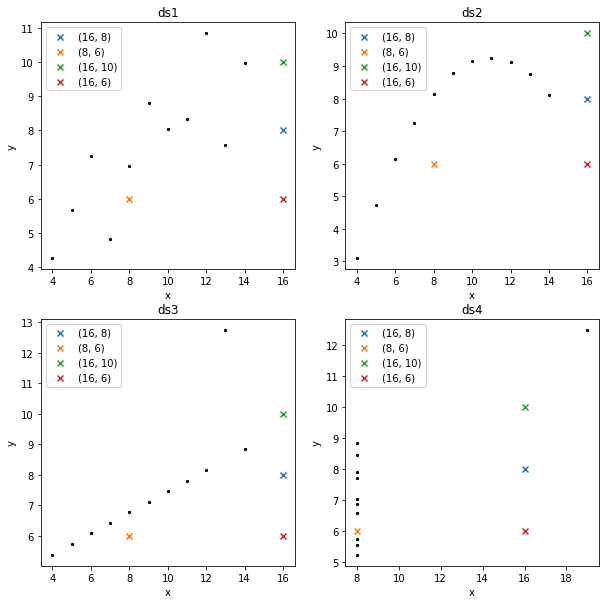

In [ ]:
# Set figure properties
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 10)

# Auxiliary function to get plot rw & col
def row_col(idx,n):
    col = idx%2
    row = idx//2
    return row , col 

# Loop over datasets
for (idx,df) in enumerate(dfs):
    
    # Get plot row & col
    row, col = row_col(idx,2)

    # Titles
    axes[row][col].set_title(df)

    # Plot dataset
    dfs[df].plot.scatter(x='x', y='y',ax=axes[row][col], s=5, color ='k')

    # Loop over unknown data points
    for index, val in dfx.iterrows():
      axes[row][col].scatter(val['x'],val['y'], label = (val[0],val[1]), marker ='x')
      axes[row][col].legend()

#Build model 

In [ ]:
# Polinomial degrees
degrees= {'ds1':1,'ds2':2,'ds3':1,'ds4':1}
models = {}

# Loop over datasets
for (idx,df) in enumerate(dfs):

  # Read data
  data=dfs[df]
 
  # Drop outliers from df3
  if df is 'ds3':
    data=data[data["y"]<12]

  # Get X, y for regression        
  X=pd.DataFrame(data['x'])
  y=pd.DataFrame(data['y'])

  # Build model pipeline
  polyreg=make_pipeline(PolynomialFeatures(degrees[df]),LinearRegression())
  
  # Fit model
  models[df] = polyreg.fit(X,y)


# Plot Model

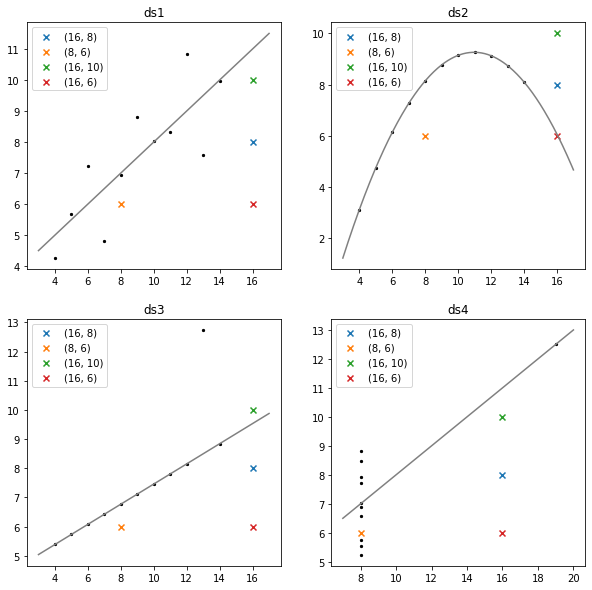

In [ ]:
# Set figure properties
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 10)

# Auxiliary function to get plot rw & col
def row_col(idx,n):
    col = idx%2
    row = idx//2
    return row , col 

# Loop over datasets
for (idx,df) in enumerate(dfs):
    
    # Get plot row & col
    row, col = row_col(idx,2)

    # Titles
    axes[row][col].set_title(df)

    # Plot dataset
    axes[row][col].scatter(dfs[df]['x'], dfs[df]['y'],s=5, color ='k')
    
    # Plot Model
    x_min = min(dfs[df]['x'].min(),dfx['x'].min())-1
    x_max = max(dfs[df]['x'].max(),dfx['x'].max())+1
    X_seq = np.linspace(x_min,x_max,300).reshape(-1,1)
    axes[row][col].plot(X_seq,models[df].predict(X_seq),color="gray")
    
    # Loop over unknown data points
    for index, val in dfx.iterrows():
      axes[row][col].scatter(val['x'],val['y'], label = (val[0],val[1]), marker ='x')
      axes[row][col].legend()




# Conclusion

###(16,8) 
Could come from ds1, but seems to be outlier for the rest

###(8,6) 
Could come from ds1 or ds4, but seems to be outlier for ds2 and ds3

###(16,10) 
Could come from ds1 or ds3, but seems to be outlier for ds2 and ds4

###(16,6)
Could come from ds2, but seems to be outlier for the rest
